# Сравнение резервуарных вычислений и полносвязной сети в задаче аппроксимации нескольких функций
### Импортируем библиотеки

In [1]:
import Generation
from SnakeNet import SnakeReluNet
import torch
from torch import nn
from torch import optim
from torch.nn import functional as F
from torch.utils.data import Dataset
import numpy as np
import pandas
import EchoStateNetworks
from dataUtils import Data
import matplotlib.pyplot as plt

### Генерируем данные

In [2]:
f1 = lambda x: 2 * torch.cos(x)
f2 = lambda x: torch.sin(x)
f3 = lambda x: 10 * torch.sin(2 * x)
f4 = lambda x: f1(x) + f2(x) + f3(x)

GenData = Generation.GenData(700, True, f1, f2, f3, f4)
X_train, Y_train = GenData.get_train_unsqueeze()
X_test, Y_test = GenData.get_test_unsqueeze()

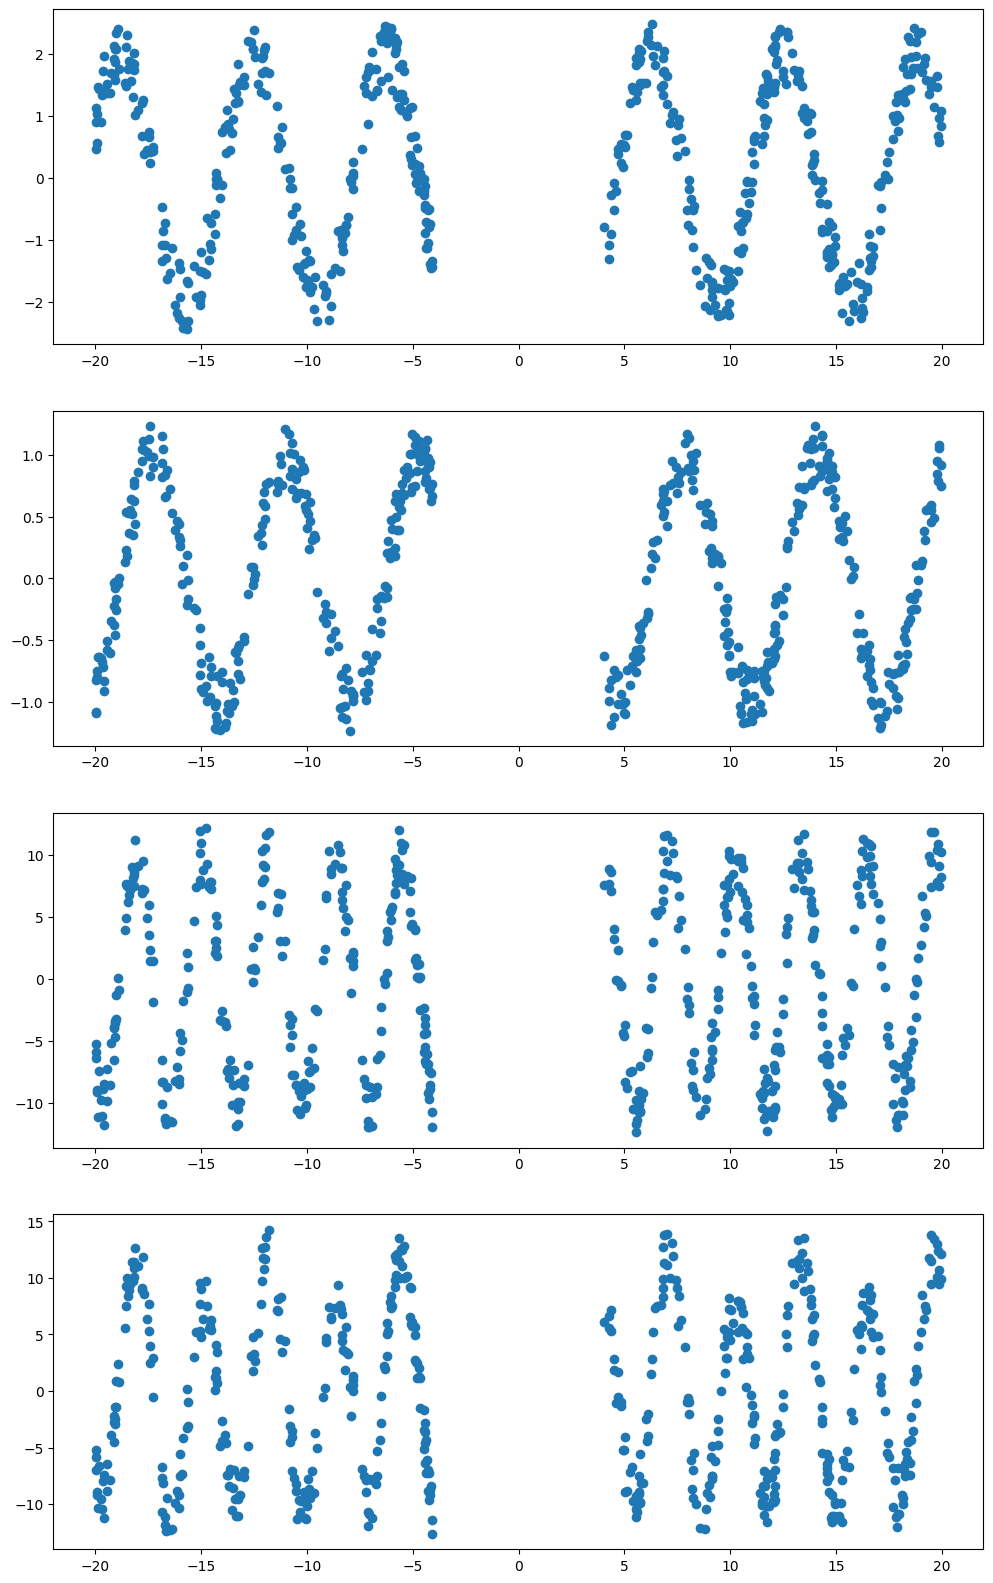

In [3]:
GenData.plot_train_signals()

In [ ]:
GenData.plot_test_signals()

In [ ]:
GenData.plot_val_signals()

Создаем dataloader

In [6]:
class MyDataset(Dataset):
    def __init__(self, data, targets):
        self.data = data
        self.targets = targets

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        x = self.data[index]
        y = self.targets[index]
        return x, y

In [7]:
train_dataset = MyDataset(X_train, Y_train)
test_dataset = MyDataset(X_test, Y_test)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=32)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=32)

### Обучаем сети


In [58]:

def train(_loader, _test_loader, ep, mod, path):  # функция для обучения модели
    er = []
    opt = optim.Adam(mod.parameters(), lr=0.001)  # задаем оптимизатор
    for epoch in range(ep + 1):  # задаем количество эпох
        total_loss = 0  # обнуляем ошибку
        mod.train()  # переводим модель в режим тренировки
        for batch in _loader:
            opt.zero_grad()  # обнуляем градиенты
            pred = mod(batch[0])  # получаем предсказание для батча
            label = batch[1]  # получаем метки для батча
            loss = F.mse_loss(pred, label)
            loss.backward()  # обратное распространение ошибки
            opt.step()  # проводим шаг оптимизации
            total_loss += loss.item() * len(batch)
        total_loss /= len(_loader.dataset)
        er.append(total_loss)
        # print('epoch: {}, loss: {}'.format(epoch, total_loss))  # выводим ошибку для эпохи
        if epoch % 5 == 0:
            test_loss = test(mod, _test_loader)
            print("Epoch {}. Loss: {:.4f}. Test loos: {:.4f}. ".format(
                epoch, total_loss, test_loss))
    # torch.save(mod.state_dict(), path)
    return er

def test(mod, _test_loader):  # функция проверки на тестовом наборе данных
    mod.eval()
    total = len(_test_loader.dataset)
    total_loss = 0
    for data in _test_loader:
        with torch.no_grad():
            pred = mod(data[0])
            label = data[1]  # получаем метки для батча
            loss = F.mse_loss(pred, label)
            total_loss += loss.item() * len(data[0])
    total_loss /= total
    return total_loss

def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.xavier_normal(m.weight)
        m.bias.data.fill_(0.01)
    

In [59]:
device = torch.device('cuda')  # Выбираем устройство для вычислений
GIN = GIN(400, 4, 0.1)
print(mlp)
GIN.apply(init_weights)
train(train_dataloader, test_dataloader, 10000, GIN, '')

SnakeReluNet(
  (fc1): Linear(in_features=1, out_features=400, bias=True)
  (act1_snake): Snake()
  (fc2): Linear(in_features=400, out_features=400, bias=True)
  (act2_snake): Snake()
  (fc3): Linear(in_features=400, out_features=200, bias=True)
  (act3_snake): Snake()
  (fc4): Linear(in_features=200, out_features=100, bias=True)
  (act4_snake): Snake()
  (fc5): Linear(in_features=100, out_features=4, bias=True)
)
Epoch 0. Loss: 3.0612. Test loos: 40.5951. 
Epoch 5. Loss: 2.1880. Test loos: 29.2530. 
Epoch 10. Loss: 1.9752. Test loos: 28.3253. 
Epoch 15. Loss: 1.9606. Test loos: 28.0796. 
Epoch 20. Loss: 1.9464. Test loos: 28.0681. 
Epoch 25. Loss: 1.9381. Test loos: 27.9637. 
Epoch 30. Loss: 1.9897. Test loos: 28.2082. 
Epoch 35. Loss: 1.9579. Test loos: 27.9393. 
Epoch 40. Loss: 1.9362. Test loos: 27.9088. 
Epoch 45. Loss: 1.9580. Test loos: 27.8705. 
Epoch 50. Loss: 1.9356. Test loos: 27.8074. 
Epoch 55. Loss: 1.9293. Test loos: 28.0057. 
Epoch 60. Loss: 1.9005. Test loos: 27.8444. 

[3.061197877363725,
 3.502653642134233,
 3.200921734896573,
 2.1419495253129437,
 2.07892859025435,
 2.188047207919034,
 2.1756435671719636,
 2.10807278026234,
 2.008066239790483,
 2.0073511851917614,
 1.9751502713290128,
 1.9657246745716441,
 1.9706774486194958,
 1.9528097048672763,
 1.9566285081343218,
 1.96057636607777,
 1.9546993879838424,
 1.953112265846946,
 1.9608959059281783,
 1.9542302079634233,
 1.9463838542591443,
 1.9408637514981357,
 1.9383885470303621,
 1.9381823244961824,
 1.9335869320956143,
 1.9381443509188565,
 1.9440134915438565,
 1.970584189675071,
 1.995046684958718,
 1.9689907282049006,
 1.9896890397505327,
 1.953554354580966,
 1.9323836586692116,
 1.951449037031694,
 1.933537694757635,
 1.9578911521218039,
 1.942858560735529,
 1.927856015292081,
 1.930787485296076,
 1.937553842717951,
 1.9361878551136364,
 1.9428627569025214,
 1.9243155670166017,
 1.941291802146218,
 1.9126514850963245,
 1.9579779676957565,
 1.9290130407159978,
 1.945969307639382,
 1.912411048195